In [ ]:
! pip install dataprep

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d aksahaha/crop-recommendation

In [ ]:
!unzip -qq crop-recommendation.zip

LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import warnings

In [ ]:
dt = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
dt.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


PRE-PROCESSING

In [ ]:
dt.shape

(2200, 10)

In [ ]:
dt.columns

In [ ]:
dt.isnull().any()

Nitrogen       False
phosphorus     False
potassium      False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
Unnamed: 8      True
Unnamed: 9      True
dtype: bool

In [ ]:
dt.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

In [ ]:
dt['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
crop_summary = pd.pivot_table(dt,index=['label'],aggfunc='mean')
crop_summary.head()

,Nitrogen,humidity,ph,phosphorus,potassium,rainfall,temperature
label,,,,,,,
apple,20.80,92.333383,5.929663,134.22,199.89,112.654779,22.630942
banana,100.23,80.358123,5.983893,82.01,50.05,104.626980,27.376798
blackgram,40.02,65.118426,7.133952,67.47,19.24,67.884151,29.973340
chickpea,40.09,16.860439,7.336957,67.79,79.92,80.058977,18.872847
coconut,21.98,94.844272,5.976562,16.93,30.59,175.686646,27.409892


In [ ]:
crop = dt.drop(['Unnamed: 8','Unnamed: 9'],axis=1)

In [ ]:
crop.head()

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(crop)

DATA SPLITTING

In [ ]:
X = crop.drop('label',axis=1)
Y = crop['label']

In [ ]:
X.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_features=SelectKBest(score_func=chi2,k=7)
ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
dtscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dtcolumns=pd.DataFrame(X.columns)

In [ ]:
features_rank=pd.concat([dtcolumns,dtscores],axis=1)

In [ ]:
features_rank.columns=['Features','Score']
features_rank

In [ ]:
features_rank.nlargest(10,'Score')

Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

In [ ]:
print(model.feature_importances_)

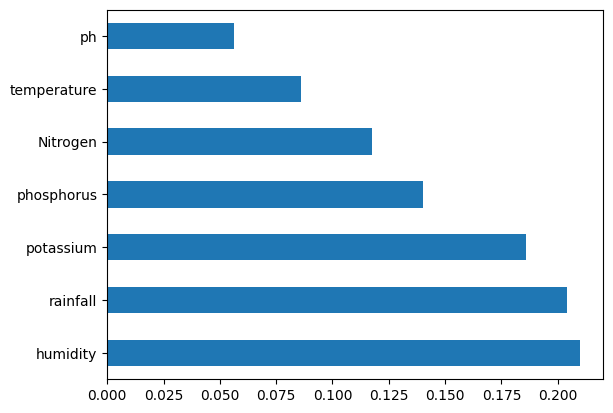

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

INFORMATION GAIN

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info=mutual_info_classif(X,Y)

In [ ]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

humidity       1.729954
potassium      1.648949
rainfall       1.637358
phosphorus     1.292586
temperature    1.017901
Nitrogen       0.990584
ph             0.686067
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle =True,
                                                 random_state=0)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
X_test.shape

(440, 7)

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

# Prints the model performance
models_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
forest = RandomForestClassifier(n_estimators=100,max_depth=5,bootstrap=True,oob_score=False,criterion='gini')
forest.fit(X_train, Y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {forest.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {forest.score(X_train,Y_train):0.3f}")

Accuracy of Test Dataset: 0.986
Accuracy of Train Dataset: 0.993


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(forest, file)

In [ ]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(Y_test, y_pred_bin)
confusion_matrix

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

In [ ]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  1.0
